In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots

file="./GOT_character_predictions.xlsx"
# loading data
GOT = pd.read_excel(io=file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
GOT.head(5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [2]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [3]:
# teating missingf value
GOT.isnull().any()

S.No                          False
name                          False
title                          True
culture                        True
dateOfBirth                    True
mother                         True
father                         True
heir                           True
house                          True
spouse                         True
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                  True
isAliveFather                  True
isAliveHeir                    True
isAliveSpouse                  True
isMarried                     False
isNoble                       False
age                            True
numDeadRelations              False
popularity                    False
isAlive                       False
dtype: bool

In [4]:
# fill the missingf value
dateOfBirth_med = GOT ['dateOfBirth'].median()
GOT['dateOfBirth'].fillna(value = dateOfBirth_med,
                       inplace = True)

isAliveMother_med = GOT ['isAliveMother'].median()
GOT['isAliveMother'].fillna(value = isAliveMother_med,
                       inplace = True)


isAliveFather_med = GOT ['isAliveFather'].median()
GOT['isAliveFather'].fillna(value = isAliveFather_med,
                       inplace = True)

isAliveHeir_med = GOT ['isAliveHeir'].median()
GOT['isAliveHeir'].fillna(value = isAliveHeir_med,
                       inplace = True)

isAliveSpouse_med = GOT ['isAliveSpouse'].median()
GOT['isAliveSpouse'].fillna(value = isAliveSpouse_med,
                       inplace = True)


age_med = GOT ['age'].median()
GOT['age'].fillna(value = age_med,
                       inplace = True)

fill = 0
GOT['title'] = GOT['title'].fillna(value = fill)



fill = 0
GOT['culture'] = GOT['culture'].fillna(value = fill)



fill = 0
GOT['dateOfBirth'] = GOT['dateOfBirth'].fillna(value = fill)



fill = 0
GOT['mother'] = GOT['mother'].fillna(value = fill)



fill = 0
GOT['father'] = GOT['father'].fillna(value = fill)



fill = 0
GOT['heir'] = GOT['heir'].fillna(value = fill)



fill = 0
GOT['house'] = GOT['house'].fillna(value = fill)



fill = 0
GOT['spouse'] = GOT['spouse'].fillna(value = fill)

In [5]:
GOT.isnull().any()

S.No                          False
name                          False
title                         False
culture                       False
dateOfBirth                   False
mother                        False
father                        False
heir                          False
house                         False
spouse                        False
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                 False
isAliveFather                 False
isAliveHeir                   False
isAliveSpouse                 False
isMarried                     False
isNoble                       False
age                           False
numDeadRelations              False
popularity                    False
isAlive                       False
dtype: bool

In [6]:
# Logistic Regression

In [7]:
# Correlation interpretation
GOT_corr = GOT.corr().round(2)

GOT_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
isAliveHeir                   0.11
isAliveSpouse                 0.08
isAliveMother                 0.07
age                           0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isNoble                      -0.04
isAliveFather                -0.04
dateOfBirth                  -0.05
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

In [8]:
# declaring explanatory variables
GOT_data = GOT.drop('isAlive', axis = 1)


# declaring response variable
GOT_target = GOT.loc[ : , 'isAlive']

In [9]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target) # preserving balance


# merging training data for statsmodels
GOT_train = pd.concat([x_train, y_train], axis = 1)

In [10]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [11]:
#  logistic regression model 
logistic_full = smf.logit(formula = """isAlive ~ 
                        book4_A_Feast_For_Crows +
                                   isAliveHeir  +
                                  isAliveSpouse + 
                                  isAliveMother +
                                            age +
                     book5_A_Dance_with_Dragons +
                        book3_A_Storm_Of_Swords +
                                        isNoble +
                                  isAliveFather +
                                    dateOfBirth +
                                      isMarried +                    
                         book2_A_Clash_Of_Kings +
                        book1_A_Game_Of_Thrones +
                                     popularity +                   
                             numDeadRelations""",
                           data    = GOT_train)


# fitting the model object
results_logistic_full = logistic_full.fit()


# checking the results SUMMARY
results_logistic_full.summary2() # summary2() has AIC and BIC

         Current function value: 0.432871
         Iterations: 35


/Users/peterxiong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
===================================================================================
Model:                    Logit                  Pseudo R-squared:       0.236     
Dependent Variable:       isAlive                AIC:                    1547.9139 
Date:                     2021-12-06 12:05       BIC:                    1635.4010 
No. Observations:         1751                   Log-Likelihood:         -757.96   
Df Model:                 15                     LL-Null:                -992.53   
Df Residuals:             1735                   LLR p-value:            1.8679e-90
Converged:                0.0000                 Scale:                  1.0000    
No. Iterations:           35.0000                                                  
-----------------------------------------------------------------------------------
                            Coef.    Std.Err.    z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------------------------
Intercept                  -81.4395 9480.5963 -0.0086 0.9931 -18663.0668 18500.1879
book4_A_Feast_For_Crows      1.3741    0.1609  8.5425 0.0000      1.0588     1.6893
isAliveHeir                 19.7486 9480.5930  0.0021 0.9983 -18561.8723 18601.3695
isAliveSpouse                0.2947    0.4788  0.6154 0.5383     -0.6438     1.2331
isAliveMother                0.8719    1.1769  0.7408 0.4588     -1.4348     3.1785
age                          0.2094    0.0273  7.6643 0.0000      0.1558     0.2629
book5_A_Dance_with_Dragons  -0.1331    0.1525 -0.8727 0.3828     -0.4320     0.1658
book3_A_Storm_Of_Swords     -0.5156    0.1521 -3.3900 0.0007     -0.8137    -0.2175
isNoble                      0.0516    0.1331  0.3872 0.6986     -0.2094     0.3125
isAliveFather               -0.2620    1.0525 -0.2490 0.8034     -2.3250     1.8009
dateOfBirth                  0.2093    0.0273  7.6634 0.0000      0.1558     0.2629
isMarried                    0.2809    0.2402  1.1694 0.2422     -0.1899     0.7517
book2_A_Clash_Of_Kings      -0.6577    0.1466 -4.4859 0.0000     -0.9450    -0.3703
book1_A_Game_Of_Thrones     -0.6127    0.1643 -3.7298 0.0002     -0.9346    -0.2907
popularity                  -2.1993    0.5728 -3.8395 0.0001     -3.3220    -1.0766
numDeadRelations            -0.0469    0.0674 -0.6963 0.4862     -0.1791     0.0852
===================================================================================

"""

In [12]:
#  logistic regression model 
logistic_full = smf.logit(formula = """isAlive ~ 
                        book4_A_Feast_For_Crows +
                                   isAliveHeir  +
                                  isAliveSpouse + 
                                  isAliveMother +
                                            age +
                     book5_A_Dance_with_Dragons +
                        book3_A_Storm_Of_Swords +
                                        isNoble +
                                  isAliveFather +
                                    dateOfBirth +
                                      isMarried +                    
                         book2_A_Clash_Of_Kings +
                        book1_A_Game_Of_Thrones +
                                     popularity +                   
                             numDeadRelations""",
                           data    = GOT_train)


# fitting the model object
results_logistic_full = logistic_full.fit()


# checking the results SUMMARY
results_logistic_full.summary() # summary2() has AIC and BIC

         Current function value: 0.432871
         Iterations: 35


/Users/peterxiong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                isAlive   No. Observations:                 1751
Model:                          Logit   Df Residuals:                     1735
Method:                           MLE   Df Model:                           15
Date:                Mon, 06 Dec 2021   Pseudo R-squ.:                  0.2363
Time:                        12:05:40   Log-Likelihood:                -757.96
converged:                      False   LL-Null:                       -992.53
Covariance Type:            nonrobust   LLR p-value:                 1.868e-90
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -81.4395   9480.596     -0.009      0.993   -1.87e+04    1.85e+04
book4_A_Feast_For_Crows        1.3741      0.161      8.542      0.000       1.059       1.689
isAliveHeir                   19.7486   9480.593      0.002      0.998   -1.86e+04    1.86e+04
isAliveSpouse                  0.2947      0.479      0.615      0.538      -0.644       1.233
isAliveMother                  0.8719      1.177      0.741      0.459      -1.435       3.179
age                            0.2094      0.027      7.664      0.000       0.156       0.263
book5_A_Dance_with_Dragons    -0.1331      0.153     -0.873      0.383      -0.432       0.166
book3_A_Storm_Of_Swords       -0.5156      0.152     -3.390      0.001      -0.814      -0.217
isNoble                        0.0516      0.133      0.387      0.699      -0.209       0.312
isAliveFather                 -0.2620      1.053     -0.249      0.803      -2.325       1.801
dateOfBirth                    0.2093      0.027      7.663      0.000       0.156       0.263
isMarried                      0.2809      0.240      1.169      0.242      -0.190       0.752
book2_A_Clash_Of_Kings        -0.6577      0.147     -4.486      0.000      -0.945      -0.370
book1_A_Game_Of_Thrones       -0.6127      0.164     -3.730      0.000      -0.935      -0.291
popularity                    -2.1993      0.573     -3.839      0.000      -3.322      -1.077
numDeadRelations              -0.0469      0.067     -0.696      0.486      -0.179       0.085
==============================================================================================
"""

In [13]:
# small logistic regression model 
logistic_sig = smf.logit(formula = """isAlive ~ 
                        book4_A_Feast_For_Crows +
                                   isAliveHeir  +
                                  isAliveSpouse + 
                                  isAliveMother +
                                            age +
                     book5_A_Dance_with_Dragons""",
                           data    = GOT_train)


# fitting the model object
results_logistic_sig = logistic_sig.fit()


# checking the results SUMMARY
results_logistic_sig.summary2() # summary2() has AIC and BIC

         Current function value: 0.520722
         Iterations: 35


/Users/peterxiong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.081     
Dependent Variable:        isAlive                AIC:                    1837.5686 
Date:                      2021-12-06 12:05       BIC:                    1875.8442 
No. Observations:          1751                   Log-Likelihood:         -911.78   
Df Model:                  6                      LL-Null:                -992.53   
Df Residuals:              1744                   LLR p-value:            2.8501e-32
Converged:                 0.0000                 Scale:                  1.0000    
No. Iterations:            35.0000                                                  
------------------------------------------------------------------------------------
                            Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------------
Intercept                  -25.9093 28676.4211 -0.0009 0.9993 -56230.6618 56178.8433
book4_A_Feast_For_Crows      1.2895     0.1266 10.1872 0.0000      1.0414     1.5376
isAliveHeir                 23.0946 28676.4211  0.0008 0.9994 -56181.6579 56227.8471
isAliveSpouse                1.2046     0.2900  4.1538 0.0000      0.6362     1.7729
isAliveMother                2.2305     1.0986  2.0303 0.0423      0.0772     4.3837
age                          0.0000     0.0000  0.5217 0.6019     -0.0001     0.0001
book5_A_Dance_with_Dragons  -0.3650     0.1296 -2.8165 0.0049     -0.6189    -0.1110
====================================================================================

"""

In [14]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logistic_full'   : ['book4_A_Feast_For_Crows', 'isAliveHeir', 'isAliveSpouse', 'isAliveMother', 'age', 
                   'book5_A_Dance_with_Dragons','book3_A_Storm_Of_Swords', 'isNoble', 'isAliveFather',
                   'dateOfBirth', 'isMarried', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones'
                  'popularity', 'numDeadRelations'],
 

 # significant variables only (set 1)
 'logistic_sig'    : ['book4_A_Feast_For_Crows' , 'isAliveHeir', 'isAliveSpouse', 'isAliveMother',
                   'age', 'book5_A_Dance_with_Dragons'],
    
    
 # significant variables only (set 2)
 'logistic_sig_2'  : ['book4_A_Feast_For_Crows', 'isAliveSpouse', 'isAliveMother',
                   'age', 'book3_A_Storm_Of_Swords', 'book5_A_Dance_with_Dragons']

}

In [15]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logistic_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logistic_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logistic_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['book4_A_Feast_For_Crows', 'isAliveHeir', 'isAliveSpouse', 'isAliveMother', 'age', 'book5_A_Dance_with_Dragons', 'book3_A_Storm_Of_Swords', 'isNoble', 'isAliveFather', 'dateOfBirth', 'isMarried', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thronespopularity', 'numDeadRelations']


First Significant p-value Model:
--------------------------------
['book4_A_Feast_For_Crows', 'isAliveHeir', 'isAliveSpouse', 'isAliveMother', 'age', 'book5_A_Dance_with_Dragons']


Second Significant p-value Model:
---------------------------------
['book4_A_Feast_For_Crows', 'isAliveSpouse', 'isAliveMother', 'age', 'book3_A_Storm_Of_Swords', 'book5_A_Dance_with_Dragons']



In [16]:
# train/test split with the full model
GOT_data   =  GOT.loc[ : , candidate_dict['logistic_sig']]
GOT_target =  GOT.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.747
LogReg Testing  ACCURACY: 0.7436
LogReg Train-Test Gap   : 0.0034


In [17]:
# The Confusion Matrix

In [18]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[  0  50]
 [  0 145]]


In [19]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 0
False Positives: 50
False Negatives: 0
True Positives : 145



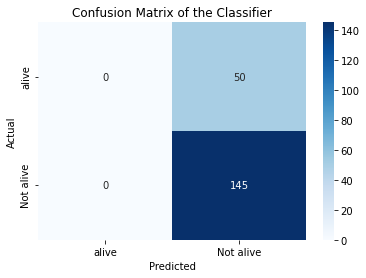

In [20]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['alive', 'Not alive'])

In [21]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.5


In [22]:
# zipping each feature name to its coefficient
logreg_model_values = zip(GOT[candidate_dict['logistic_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.05)
('book4_A_Feast_For_Crows', 1.17)
('isAliveSpouse', 0.13)
('isAliveMother', 0.24)
('age', 0.1)
('book3_A_Storm_Of_Swords', 0.0)
('book5_A_Dance_with_Dragons', -0.03)


In [23]:
# Classification Trees 

In [24]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [25]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8035
Full Tree Testing ACCURACY : 0.7641
Full Tree AUC Score: 0.5924


In [26]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 12
False Positives: 38
False Negatives: 8
True Positives : 137



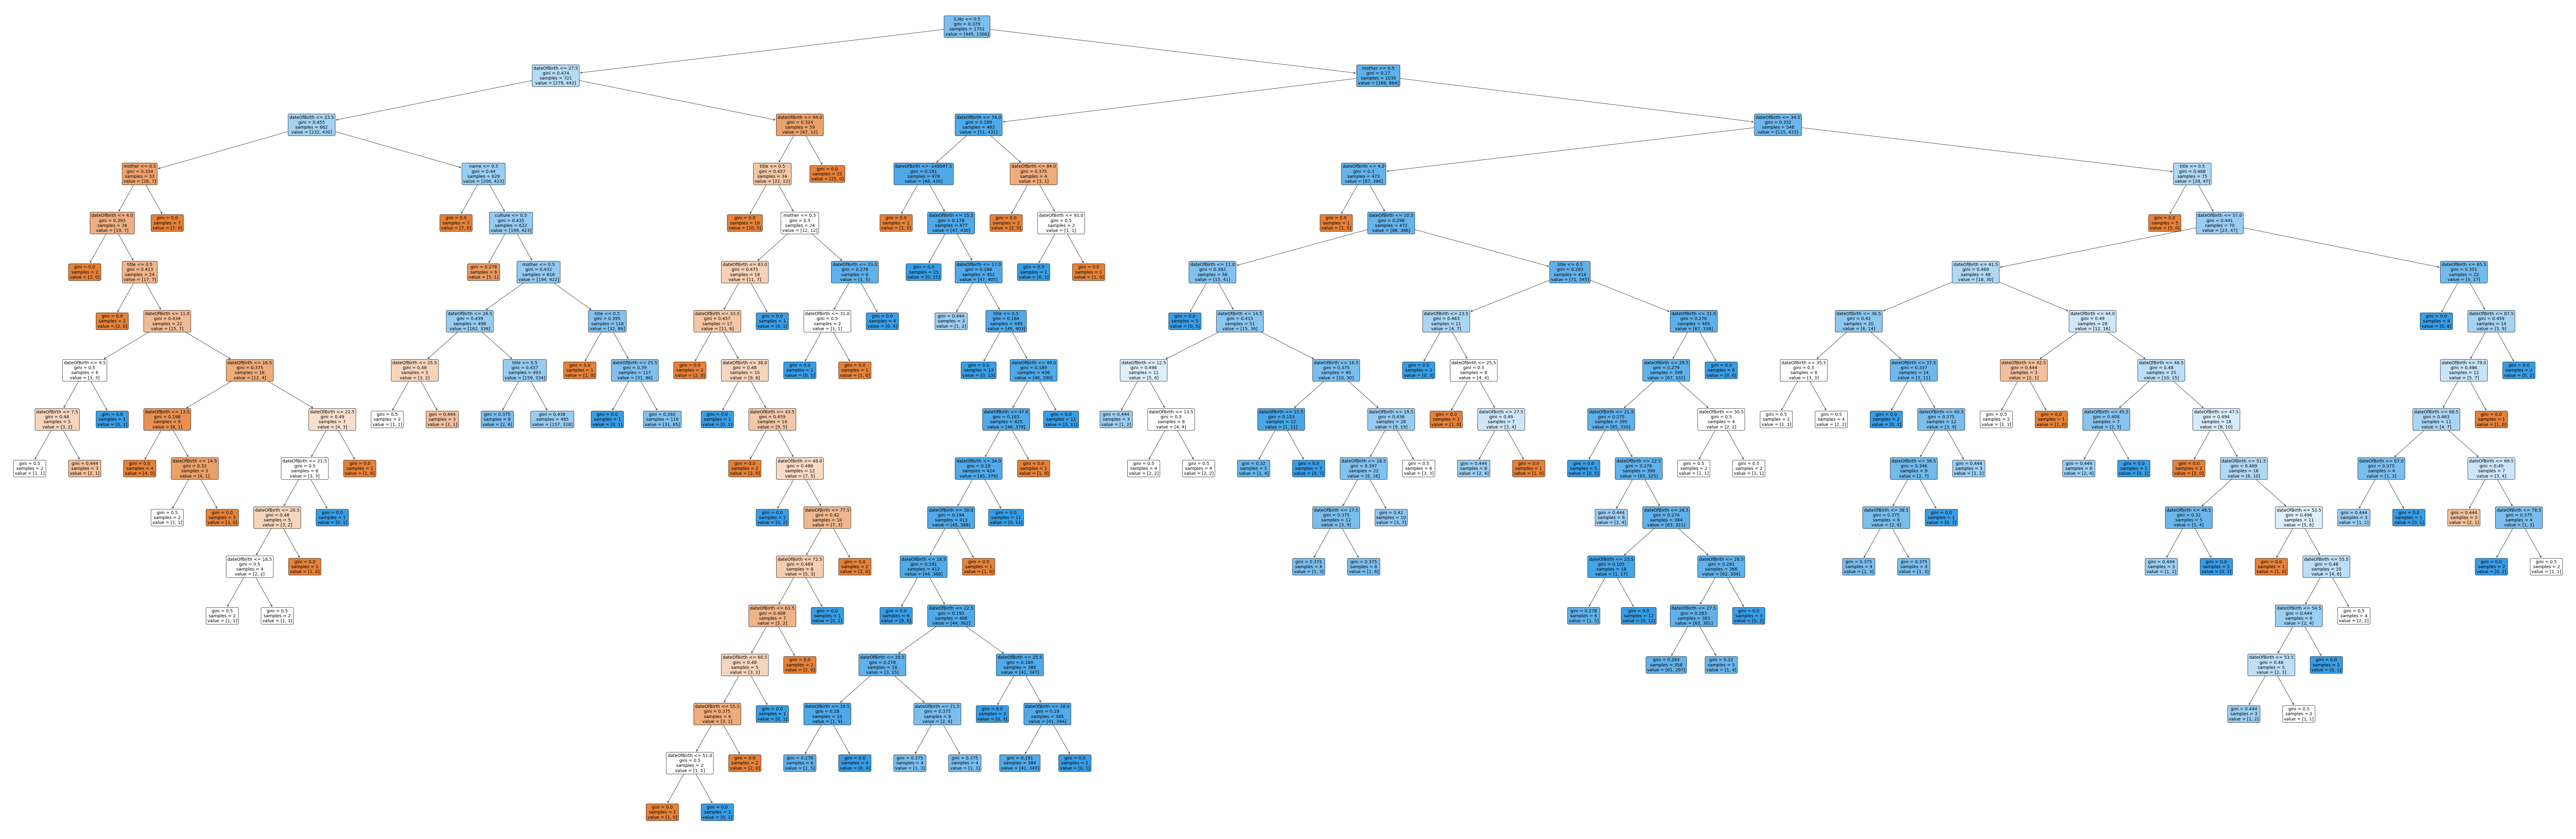

In [27]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = GOT.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [28]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 7,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7767
Testing  ACCURACY: 0.8103
AUC Score        : 0.63


In [29]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 13
False Positives: 37
False Negatives: 0
True Positives : 145



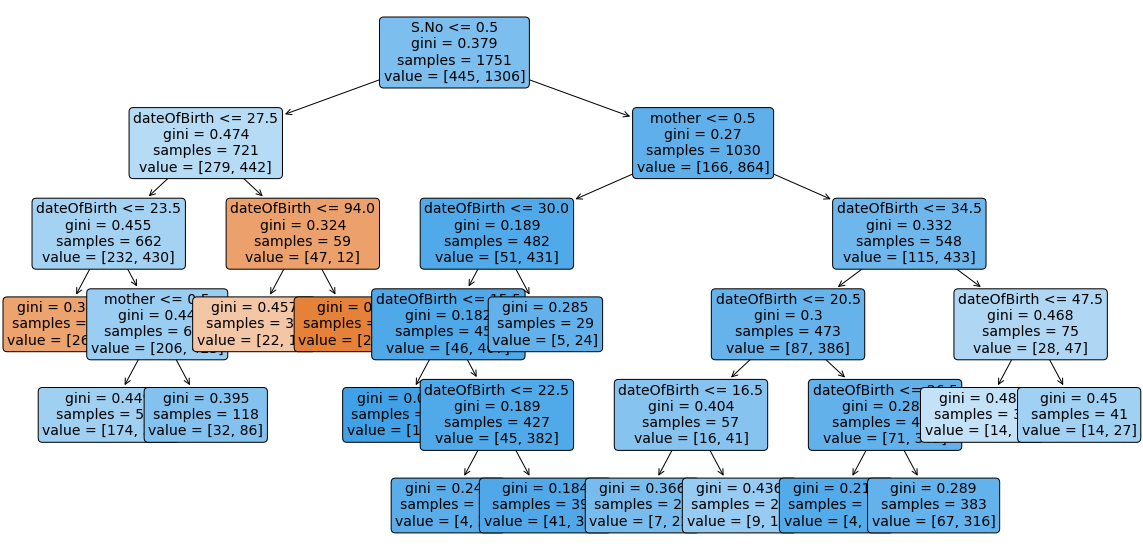

In [30]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = GOT.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

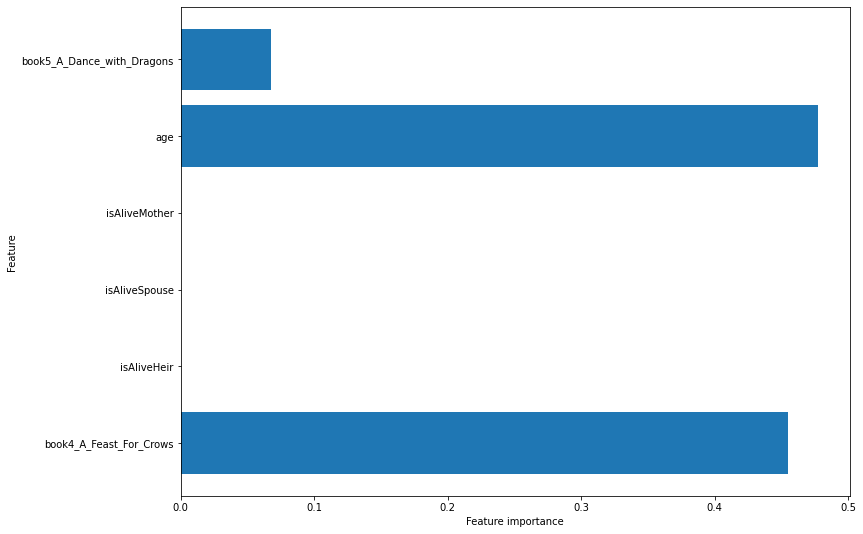

In [31]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [32]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.5         (0, 50, 0, 145)
Full Tree     0.5924           (12, 38, 8, 137)
Pruned Tree   0.63         (13, 37, 0, 145)



In [34]:
#######################################
# importing packages
########################################

# essentials
import matplotlib.pyplot as plt # data visualization
import pandas            as pd  # data science essentials
import numpy             as np  # mathematical essentials


# machine learning
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix


# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


########################################
# loading data and setting display options
########################################
# loading data
GOT = pd.read_excel('./GOT_character_predictions.xlsx')


# loading model performance
model_performance = pd.read_excel('./classification_model_performance.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


########################################
# explanatory variable sets
########################################
candidate_dict = {

 # full model
 'logistic_full'   : ['book4_A_Feast_For_Crows', 'isAliveHeir', 'isAliveSpouse', 'isAliveMother', 'age', 
                   'book5_A_Dance_with_Dragons','book3_A_Storm_Of_Swords', 'isNoble', 'isAliveFather',
                   'dateOfBirth', 'isMarried', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones'
                  'popularity', 'numDeadRelations'],
 

 # significant variables only (set 1)
 'logistic_sig'    : ['book4_A_Feast_For_Crows' , 'isAliveHeir', 'isAliveSpouse', 'isAliveMother',
                   'age', 'book5_A_Dance_with_Dragons'],
    
    
 # significant variables only (set 2)
 'logistic_sig_2'  : ['book4_A_Feast_For_Crows', 'isAliveSpouse', 'isAliveMother',
                   'age', 'book3_A_Storm_Of_Swords', 'book5_A_Dance_with_Dragons']
}


########################################
# checking previous model performances
########################################
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5000,0.7470,0.7436,"(0, 50, 0, 145)"
1,Full Tree,0.5924,0.8035,0.7641,"(12, 38, 8, 137)"
2,Pruned Tree,0.6300,0.7767,0.8103,"(13, 37, 0, 145)"


In [ ]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [35]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 7,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [36]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.7933
Testing  ACCURACY: 0.7846
AUC Score        : 0.5931


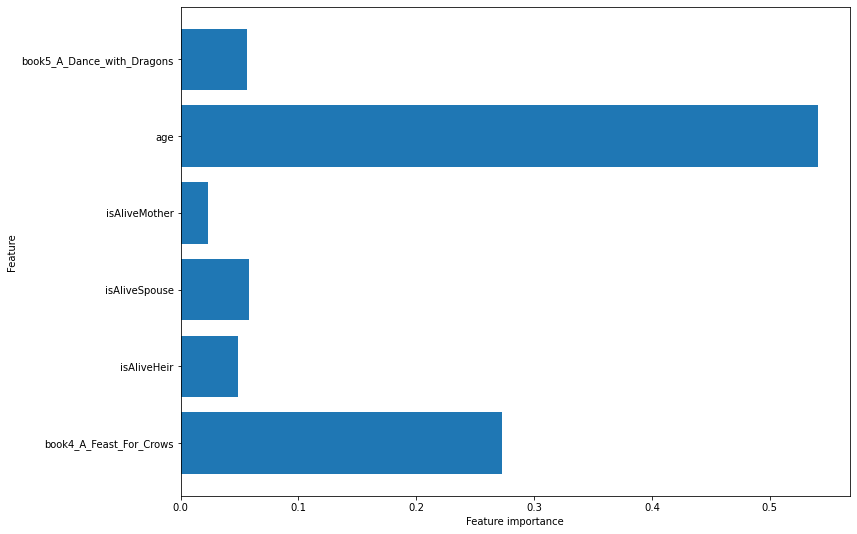

In [37]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [38]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 10
False Positives: 40
False Negatives: 2
True Positives : 143



In [39]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5000,0.7470,0.7436,"(0, 50, 0, 145)"
1,Full Tree,0.5924,0.8035,0.7641,"(12, 38, 8, 137)"
2,Pruned Tree,0.6300,0.7767,0.8103,"(13, 37, 0, 145)"
3,Random Forest (Full),0.5931,0.7933,0.7846,"(10, 40, 2, 143)"


In [40]:
# GBM explaination

In [41]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 5,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8035
Testing ACCURACY : 0.7949
AUC Score        : 0.6131


In [42]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 12
False Positives: 38
False Negatives: 2
True Positives : 143



In [43]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5000,0.7470,0.7436,"(0, 50, 0, 145)"
1,Full Tree,0.5924,0.8035,0.7641,"(12, 38, 8, 137)"
2,Pruned Tree,0.6300,0.7767,0.8103,"(13, 37, 0, 145)"
3,Random Forest (Full),0.5931,0.7933,0.7846,"(10, 40, 2, 143)"
4,GBM (Full),0.6131,0.8035,0.7949,"(12, 38, 2, 143)"


In [44]:
# knn

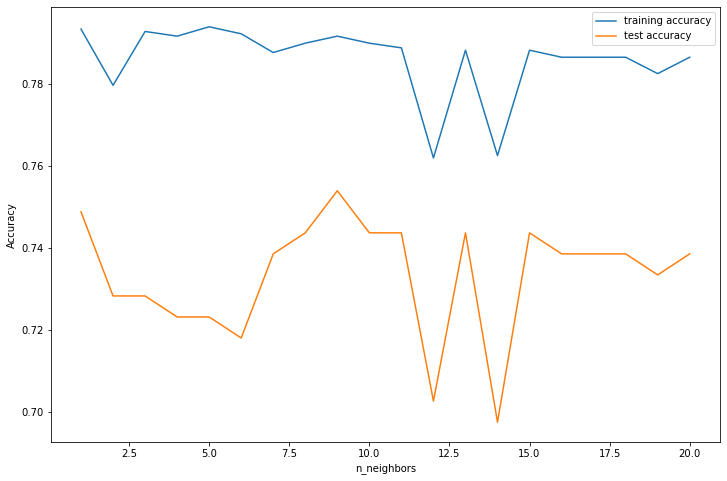

The optimal number of neighbors is: 9


In [45]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = GOT_data,
                                  y_data        = GOT_target,
                                  response_type = 'class')

In [46]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(GOT_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(GOT_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.6859
Testing  ACCURACY: 0.6923
AUC Score        : 0.6162


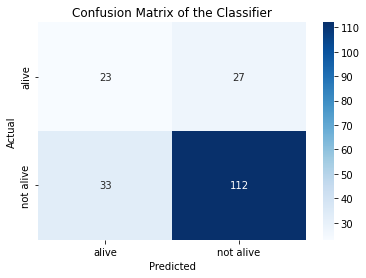

In [47]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['alive', 'not alive'])

In [48]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 33
True Positives : 112



In [49]:
#results
print(f"""
Model                               Train Score      Test Score         AUC        TN, FP, FN, TP
-----                                -----------      ----------     ----------    ----------- 
Logistic Regression                   {logreg_train_score}            {logreg_test_score}         {logreg_auc_score}        {logreg_tn, logreg_fp, logreg_fn, logreg_tp}   
KNN                                   {knn_train_score}           {knn_test_score}         {knn_auc_score}     {knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp}    
full Trees                            {full_tree_train_score}           {full_tree_test_score}         {full_tree_auc_score}     {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}    
Random Forest                         {rf_train_acc}           {rf_test_acc}         {rf_auc}      {rf_tn, rf_fp, rf_fn, rf_tp}   
GBM                                   {gbm_train_acc}           {gbm_test_acc}         {gbm_auc}      {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
pruned Trees                          {pruned_tree_train_score}           {pruned_tree_test_score}         {pruned_tree_auc_score}        {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}


""")
print("the pruned trees is my final model")


Model                               Train Score      Test Score         AUC        TN, FP, FN, TP
-----                                -----------      ----------     ----------    ----------- 
Logistic Regression                   0.747            0.7436         0.5        (0, 50, 0, 145)   
KNN                                   0.6859           0.6923         0.6162     (23, 27, 33, 112)    
full Trees                            0.8035           0.7641         0.5924     (12, 38, 8, 137)    
Random Forest                         0.7933           0.7846         0.5931      (10, 40, 2, 143)   
GBM                                   0.8035           0.7949         0.6131      (12, 38, 2, 143)
pruned Trees                          0.7767           0.8103         0.63        (13, 37, 0, 145)



the pruned trees is my final model
